In [1]:
from sqlalchemy import create_engine, inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time, datetime

#Dades de connexió

usuario='EquipoB'

contraseña="E1q2u3i4p5oB"
host='212.227.90.6'
puerto=3306
nombre_base_datos='EquipB'

#Crear la URL de la connexió
url_conexion=f"mysql+pymysql://{usuario}:{contraseña}@{host}:{puerto}/{nombre_base_datos}"

try:
    #Crear el engine de SQLAlchemy
    engine=create_engine(url_conexion)
    cnx=engine.connect()

    print("conexió correcta")
    #cnx.close()
except Exception as e:
    print(f"Error al conectar con SQLAlchemy: {e}")
    
#Recordar que inspect del codi anterior quan creo la connexió amb sqlalchemy
#from sqlalchemy import create_engine, inspect
inspector=inspect(engine)
nombre_tablas=inspector.get_table_names()

# Diccionario para almacenar los DataFrames
df= {}

for taula in nombre_tablas:
    query=f"select * from {taula}"
    
    try:
        df[taula] = pd.read_sql(query, cnx)
        print(f"Taula '{taula}' carregada correctament.")
    except Exception as e:
        print(f"Error al carregar la taula '{taula}':{e}")
  
# Tancar la connexió
cnx.close()

conexió correcta
Taula 'BANK_marketing' carregada correctament.
Taula 'BANK_marketing131024' carregada correctament.


In [2]:
df_BANK_marketing=df['BANK_marketing131024']

In [3]:
df_BANK_marketing.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,2,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
2,3,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
3,4,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
4,5,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1


In [4]:
df_BANK_vista_marketing=df_BANK_marketing[['id','age','contact','day','month','duration','campaign','pdays','previous','poutcome','deposit']]

In [5]:
df_BANK_vista_marketing.describe()

,id,age,day,duration,campaign,pdays,previous,deposit
count,16163.000000,16163.000000,16163.000000,16163.000000,16163.000000,16163.000000,16163.000000,16163.000000
mean,9696.799233,41.262699,15.647157,372.542288,2.508816,51.326734,0.824909,0.473860
std,6754.310906,11.961480,8.417469,345.261981,2.751196,109.031324,2.241574,0.499332
min,1.000000,18.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,4041.500000,32.000000,8.000000,139.000000,1.000000,-1.000000,0.000000,0.000000
50%,8082.000000,39.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,17342.500000,49.000000,22.000000,498.000000,3.000000,10.000000,1.000000,1.000000
max,21383.000000,95.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


In [6]:
df_BANK_vista_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16163 entries, 0 to 16162
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        16163 non-null  int64 
 1   age       16163 non-null  int64 
 2   contact   16163 non-null  object
 3   day       16163 non-null  int64 
 4   month     16163 non-null  object
 5   duration  16163 non-null  int64 
 6   campaign  16163 non-null  int64 
 7   pdays     16163 non-null  int64 
 8   previous  16163 non-null  int64 
 9   poutcome  16163 non-null  object
 10  deposit   16163 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 1.4+ MB


In [7]:
df_BANK_vista_marketing = df_BANK_vista_marketing.copy()

df_BANK_vista_marketing['contact'] = df_BANK_vista_marketing['contact'].astype('category')
df_BANK_vista_marketing['month'] = df_BANK_vista_marketing['month'].astype('category')
df_BANK_vista_marketing['poutcome'] = df_BANK_vista_marketing['poutcome'].astype('category')




In [8]:
df_BANK_vista_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16163 entries, 0 to 16162
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        16163 non-null  int64   
 1   age       16163 non-null  int64   
 2   contact   16163 non-null  category
 3   day       16163 non-null  int64   
 4   month     16163 non-null  category
 5   duration  16163 non-null  int64   
 6   campaign  16163 non-null  int64   
 7   pdays     16163 non-null  int64   
 8   previous  16163 non-null  int64   
 9   poutcome  16163 non-null  category
 10  deposit   16163 non-null  int64   
dtypes: category(3), int64(8)
memory usage: 1.0 MB


In [9]:
df_BANK_vista_marketing['previous_contact'] = df_BANK_vista_marketing['pdays'].apply(lambda x: 0 if x == -1 else 1)


# Agrupación por tipo de contacto:

Agrupa los datos por el tipo de contacto (móvil o telefónico) y calcula la tasa de conversión para cada uno de ellos.

In [10]:
conversion_rate = df_BANK_vista_marketing.groupby('contact')['deposit'].mean()
print(conversion_rate)


contact
cellular     0.542570
telephone    0.503923
unknown      0.227863
Name: deposit, dtype: float64


# Análisis estadístico

In [11]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia
contingency_table = pd.crosstab(df_BANK_vista_marketing['contact'], df_BANK_vista_marketing['deposit'])

# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, p-value: {p}")


Chi2: 1046.6839002852457, p-value: 5.193724448879824e-228


    Chi2: 1046.68: Este valor del estadístico de chi-cuadrado es bastante alto. Un valor elevado indica que hay una gran discrepancia entre los valores observados y los esperados bajo la hipótesis nula (la hipótesis de que no hay asociación entre el tipo de contacto y la tasa de conversión).

    p-value: 5.19e-228: El valor p es extremadamente pequeño (prácticamente 0). Esto significa que hay una probabilidad muy baja de que las diferencias observadas entre los tipos de contacto (móvil o telefónico) sean debidas al azar.

Interpretación:

    Dado que el valor p es mucho menor que el umbral comúnmente aceptado de 0.05, rechazas la hipótesis nula. Esto implica que existe una relación significativa entre el tipo de contacto (móvil o telefónico) y la tasa de conversión de las campañas de marketing.

    En términos más simples, la manera en que se contacta a los clientes (ya sea móvil o telefónicamente) tiene un impacto notable en si hacen un depósito o no.

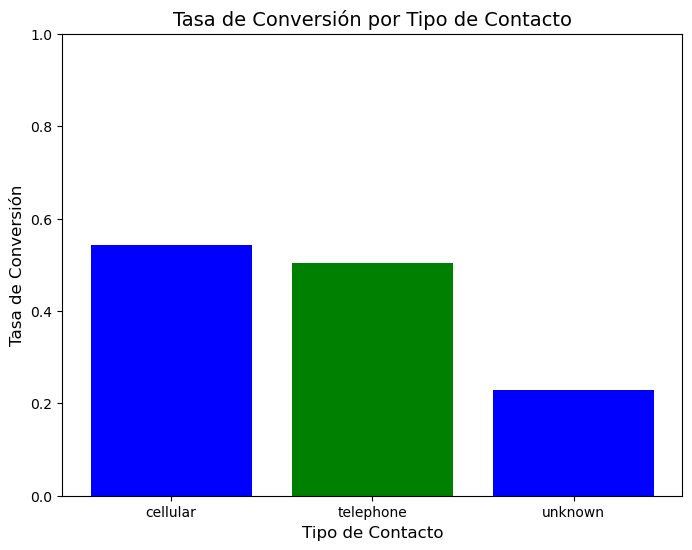

In [12]:
import matplotlib.pyplot as plt

# Calcular la tasa de conversión por tipo de contacto
conversion_rate = df_BANK_vista_marketing.groupby('contact')['deposit'].mean()

# Crear una gráfica de barras
plt.figure(figsize=(8,6))
plt.bar(conversion_rate.index, conversion_rate.values, color=['blue', 'green'])
plt.title('Tasa de Conversión por Tipo de Contacto', fontsize=14)
plt.xlabel('Tipo de Contacto', fontsize=12)
plt.ylabel('Tasa de Conversión', fontsize=12)
plt.ylim(0, 1)  # Limitar el eje y a 1 (100%)
plt.show()


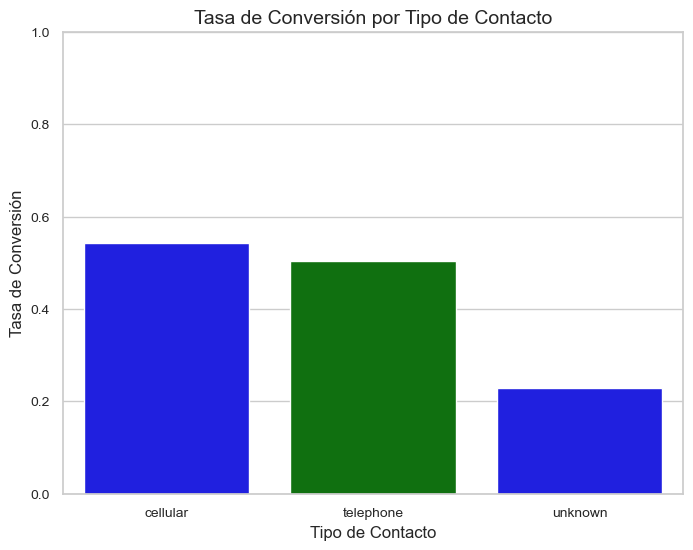

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo y contexto de Seaborn
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2, rc={
    "axes.labelsize": 12,
    "axes.titlesize": 14,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10
})

# Calcular la tasa de conversión por tipo de contacto
conversion_rate = df_BANK_vista_marketing.groupby('contact')['deposit'].mean().reset_index()

# Crear una gráfica de barras usando Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='contact', y='deposit', data=conversion_rate, palette=['blue', 'green'])

# Agregar título y etiquetas
plt.title('Tasa de Conversión por Tipo de Contacto')
plt.xlabel('Tipo de Contacto')
plt.ylabel('Tasa de Conversión')

# Limitar el eje Y a 1 (100%)
plt.ylim(0, 1)

# Mostrar el gráfico
plt.show()


## A partir de la gráfica que muestra la tasa de conversión por tipo de contacto, podemos extraer las siguientes conclusiones:

    Contacto por móvil ("cellular") tiene la tasa de conversión más alta: Esto indica que las campañas de marketing que utilizan el contacto a través de móviles son más efectivas, ya que logran que una mayor proporción de clientes realicen un depósito en comparación con otros tipos de contacto.

    Contacto telefónico ("telephone") también es efectivo, pero ligeramente inferior al móvil: La tasa de conversión para el contacto telefónico es menor que la del contacto móvil, lo que sugiere que este tipo de contacto es menos efectivo, aunque todavía tiene buenos resultados en comparación con otros métodos.


## Recomendaciones basadas en estos resultados:

    Priorizar el contacto móvil en las campañas futuras: Dado que el contacto por móvil tiene la mayor tasa de conversión, podrías redirigir una mayor parte del esfuerzo y los recursos de marketing hacia este canal.

    Optimizar el contacto telefónico: Aunque el contacto telefónico tiene una tasa de conversión más baja que el móvil, sigue siendo un canal relevante. Podrías mejorar la eficiencia de este canal ajustando los guiones de venta, capacitando mejor a los agentes o personalizando las campañas.



## Objetivos para hoy
-- Tasa conversion por edades
-- Solo para el nicho de medio y medio alto (los mejores de contratación)
-- Dividir las edades por interquartiles o Segun el ine
-- Estrategia final

## Tasa conversión por edades

In [29]:
df_BANK_vista_marketing['age_range'] = pd.qcut(df_BANK_vista_marketing['age'], q=4, labels=["Jóvenes adultos (18-32)", "Adultos jóvenes (33-39)", "Adultos medios (40-49)", "Adultos mayores (50-95)"])
# Obtener los valores mínimos y máximos de cada cuartil
quartile_ranges = df_BANK_vista_marketing.groupby('age_range')['age'].agg(['min', 'max'])

# Mostrar los rangos de los cuartiles
print(quartile_ranges)

                         min  max
age_range                        
Jóvenes adultos (18-32)   18   32
Adultos jóvenes (33-39)   33   39
Adultos medios (40-49)    40   49
Adultos mayores (50-95)   50   95


In [30]:
conversion_rate_by_age = df_BANK_vista_marketing.groupby(['age_range', 'contact'])['deposit'].mean()
print(conversion_rate_by_age)


age_range                contact  
Jóvenes adultos (18-32)  cellular     0.593928
                         telephone    0.460674
                         unknown      0.273973
Adultos jóvenes (33-39)  cellular     0.510659
                         telephone    0.367089
                         unknown      0.215582
Adultos medios (40-49)   cellular     0.472755
                         telephone    0.370213
                         unknown      0.216754
Adultos mayores (50-95)  cellular     0.584840
                         telephone    0.609375
                         unknown      0.206349
Name: deposit, dtype: float64


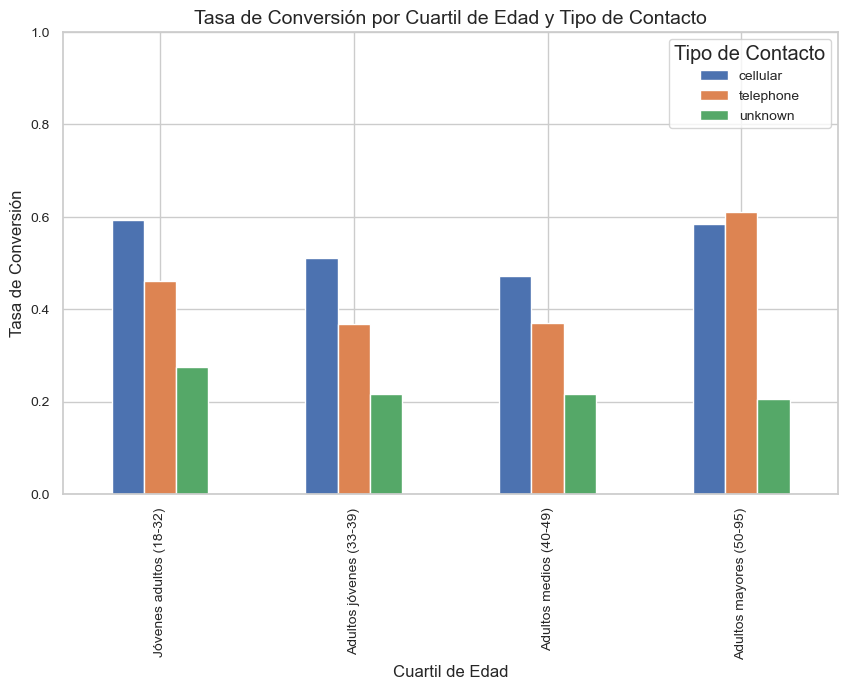

In [31]:
import matplotlib.pyplot as plt

conversion_rate_by_age.unstack().plot(kind='bar', figsize=(10,6))
plt.title('Tasa de Conversión por Cuartil de Edad y Tipo de Contacto')
plt.xlabel('Cuartil de Edad')
plt.ylabel('Tasa de Conversión')
plt.ylim(0, 1)
plt.legend(title='Tipo de Contacto')
plt.show()


1. El contacto móvil (celular) es más efectivo en los clientes más jóvenes (Q1 y Q2):

    En el cuartil Q1 (18-32 años), la tasa de conversión más alta se da en contacto celular (59.39%), superando al contacto telefónico y al tipo de contacto "unknown". Los clientes más jóvenes parecen preferir el contacto móvil.
    En Q2 (33-39 años), el contacto celular también lidera con un 51.07% de tasa de conversión, destacando como el canal más efectivo.

Recomendación: Para los clientes jóvenes (Q1 y Q2), deberías priorizar el contacto a través de móviles (SMS o WhatsApp), ya que son los más receptivos a este canal.
2. El contacto telefónico es más efectivo en clientes mayores (Q4):

    En el cuartil Q4 (50-95 años), el contacto telefónico (60.94%) supera al contacto celular. Esto sugiere que los clientes de mayor edad responden mejor a llamadas telefónicas tradicionales.
    Aunque el contacto celular sigue siendo efectivo en este cuartil (58.48% de conversión), el teléfono es ligeramente superior.

Recomendación: Para los clientes mayores (Q4), prioriza las llamadas telefónicas en lugar de mensajes de texto o móviles. Este segmento de clientes parece responder mejor a un trato más directo por teléfono.
3. El contacto "unknown" tiene tasas de conversión consistentemente bajas:

    En todos los cuartiles, el tipo de contacto "unknown" tiene la tasa de conversión más baja, especialmente en el cuartil Q4 (20.63%).
    Esto sugiere que, cuando no se tiene un canal claro de contacto con el cliente, la efectividad de las campañas disminuye considerablemente.

Recomendación: Evita depender de contactos no identificados o sin un canal claro ("unknown"). Asegúrate de registrar y utilizar correctamente el tipo de contacto preferido del cliente para maximizar la efectividad.
4. Caída gradual en la efectividad del contacto celular en cuartiles más altos (Q3):

    En el cuartil Q3 (40-49 años), el contacto celular tiene una tasa de conversión de 47.27%, inferior a los cuartiles anteriores. Esto sugiere que el contacto móvil empieza a perder efectividad en los clientes de mediana edad.

Recomendación: Para los clientes de mediana edad (Q3), podrías complementar las campañas móviles con llamadas telefónicas para aumentar la conversión.
Conclusiones generales:

    Prioriza el contacto móvil (celular) para los clientes más jóvenes (Q1 y Q2), ya que tienen la mayor tasa de conversión en estos segmentos.
    Refuerza el contacto telefónico en clientes mayores (Q4), quienes responden mejor a este tipo de contacto.
    Evita el contacto "unknown" y asegúrate de tener un canal de comunicación claro y preferido para mejorar la tasa de conversión en todos los grupos de edad.
    Adapta las estrategias de contacto según el cuartil de edad, maximizando el uso de los canales más efectivos para cada grupo.



# Calcular ANOVA

In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

# Asegurarse de que contact y age_range sean categóricos
df_BANK_vista_marketing['contact'] = df_BANK_vista_marketing['contact'].astype('category')
df_BANK_vista_marketing['age_range'] = pd.qcut(df_BANK_vista_marketing['age'], q=4, labels=["Jóvenes adultos (18-32)", "Adultos jóvenes (33-39)", "Adultos medios (40-49)", "Adultos mayores (50-95)"])

# Definir el modelo ANOVA
model = ols('deposit ~ C(contact) + C(age_range) + C(contact):C(age_range)', data=df_BANK_vista_marketing).fit()

# Realizar ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                              sum_sq       df           F         PR(>F)
C(contact)                248.079089      2.0  538.062356  5.997153e-227
C(age_range)               33.212778      3.0   48.023786   6.859871e-31
C(contact):C(age_range)    12.246397      6.0    8.853796   1.150571e-09
Residual                 3723.290918  16151.0         NaN            NaN


Este análisis confirma que tanto el tipo de contacto como la edad tienen un impacto significativo en la conversión, y que el efecto del tipo de contacto cambia según el rango de edad.

# Regresión Logística

In [36]:
import pandas as pd
import statsmodels.api as sm

# Crear variables dummies para las variables categóricas
X = pd.get_dummies(df_BANK_vista_marketing[['contact', 'age_range']], drop_first=True)
y = df_BANK_vista_marketing['deposit']

# Ajustar el modelo de regresión logística
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Mostrar los resultados
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.657341
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                deposit   No. Observations:                16163
Model:                          Logit   Df Residuals:                    16158
Method:                           MLE   Df Model:                            4
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                 0.04978
Time:                        16:19:58   Log-Likelihood:                -10625.
converged:                       True   LL-Null:                       -11181.
Covariance Type:            nonrobust   LLR p-value:                1.007e-239
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
contact_telephone                    -0.1224      0.063     -1

# Conclusiones:

- El contacto celular es más efectivo que el contacto telefónico o desconocido. El contacto desconocido es claramente desfavorable para la conversión.
- Los clientes mayores (Q4) tienen una probabilidad significativamente mayor de contratar un depósito en comparación con los más jóvenes (Q1). Sin embargo, los clientes de mediana edad (Q3) tienen una menor probabilidad de conversión.

# Duración Media de la Llamada por Cuartil de Edad y Tipo de Contacto

In [37]:
avg_duration_by_age_contact = df_BANK_vista_marketing.groupby(['age_range', 'contact'])['duration'].mean()
print(avg_duration_by_age_contact)



age_range                contact  
Jóvenes adultos (18-32)  cellular     375.402465
                         telephone    326.696629
                         unknown      394.723537
Adultos jóvenes (33-39)  cellular     382.636305
                         telephone    340.740506
                         unknown      368.318036
Adultos medios (40-49)   cellular     380.169225
                         telephone    300.310638
                         unknown      359.986387
Adultos mayores (50-95)  cellular     367.074259
                         telephone    379.166667
                         unknown      340.868687
Name: duration, dtype: float64


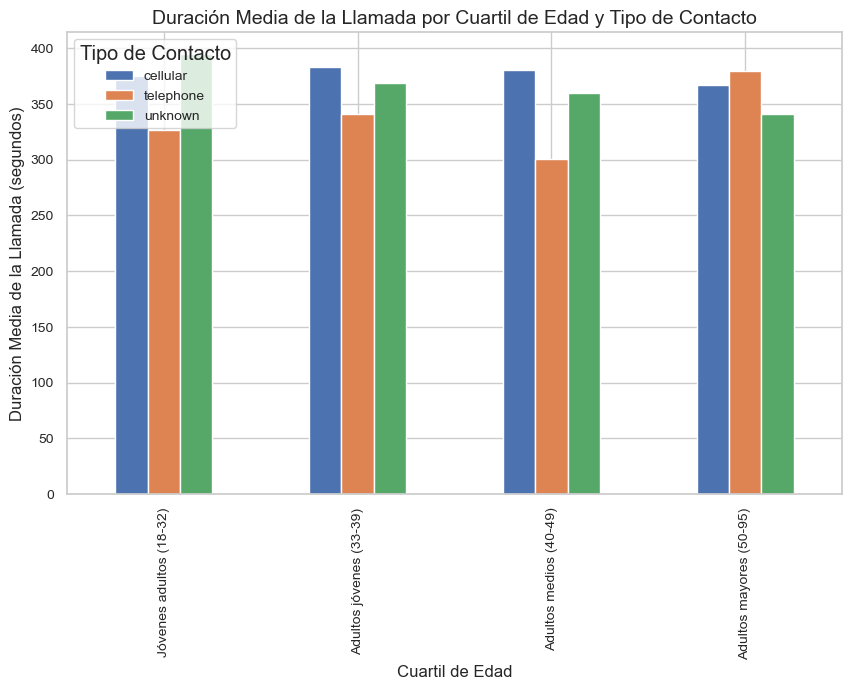

In [38]:
import matplotlib.pyplot as plt

# Calcular la duración media de la llamada por cuartil de edad y tipo de contacto
avg_duration_by_age_contact = df_BANK_vista_marketing.groupby(['age_range', 'contact'])['duration'].mean()

# Convertir los resultados a un DataFrame para facilitar el gráfico
avg_duration_df = avg_duration_by_age_contact.unstack()

# Crear gráfico de barras agrupadas
avg_duration_df.plot(kind='bar', figsize=(10,6))

# Títulos y etiquetas
plt.title('Duración Media de la Llamada por Cuartil de Edad y Tipo de Contacto')
plt.xlabel('Cuartil de Edad')
plt.ylabel('Duración Media de la Llamada (segundos)')
plt.legend(title='Tipo de Contacto')

# Mostrar el gráfico
plt.show()


1. Las llamadas móviles (cellular) tienden a ser más largas en los clientes jóvenes (Q1 y Q2):

    En el cuartil Q1 (18-32 años), las llamadas móviles tienen una duración promedio de 375.4 segundos, siendo más largas que las llamadas telefónicas (326.7 segundos). Esto sugiere que los clientes jóvenes, cuando son contactados por móvil, tienden a participar en conversaciones más largas, lo que podría indicar mayor interés o disposición a interactuar a través de este canal.
    En el cuartil Q2 (33-39 años), la tendencia continúa, con una duración promedio de 382.6 segundos en llamadas móviles frente a 340.7 segundos en llamadas telefónicas.

Recomendación: El canal móvil debería ser prioritario para los clientes jóvenes, ya que tienden a interactuar durante más tiempo y posiblemente a comprometerse más con el mensaje.
2. En el cuartil Q4 (50-95 años), las llamadas telefónicas son más largas que las móviles:

    En el cuartil Q4 (50-95 años), las llamadas telefónicas son más largas (379.17 segundos) que las llamadas móviles (367.07 segundos). Esto podría indicar que los clientes de mayor edad prefieren hablar por teléfono en lugar de por móvil y están más dispuestos a mantener conversaciones largas cuando se les contacta a través de este canal.

Recomendación: Para los clientes mayores, prioriza el contacto telefónico, ya que parece ser el canal más efectivo para tener conversaciones más largas y posiblemente más efectivas.
3. El contacto "unknown" muestra duraciones inconsistentes:

    Las llamadas de contacto desconocido (unknown) muestran duraciones más altas en Q1 (394.72 segundos) pero más bajas en Q4 (340.87 segundos). Esto podría deberse a la falta de claridad o identificación de un canal de contacto adecuado.

Recomendación: El contacto "unknown" debería evitarse o mejorarse en términos de registro, ya que no parece ser un canal fiable o efectivo en cuanto a la duración y el impacto en la conversión.
4. El cuartil Q3 (40-49 años) tiene duraciones de llamadas notablemente más cortas en contacto telefónico:

    En el cuartil Q3 (40-49 años), las llamadas telefónicas tienen una duración media de solo 300.31 segundos, significativamente más corta que las llamadas móviles (380.17 segundos).

Recomendación: Para este grupo de edad, deberías favorecer el contacto móvil en lugar de las llamadas telefónicas, ya que las conversaciones son más largas a través del canal móvil, lo que puede mejorar la tasa de conversión.
5. Tendencia general de llamadas móviles y telefónicas:

    En general, las llamadas móviles tienden a ser más largas en los cuartiles más jóvenes (Q1 y Q2), mientras que las llamadas telefónicas son más largas en los clientes mayores (Q4). Esto sugiere que el canal óptimo cambia según la edad, y el éxito de la duración de la llamada está relacionado con la adaptación del canal correcto.

Conclusión General:

    Clientes jóvenes (Q1, Q2): Debes priorizar el contacto móvil, ya que las llamadas tienden a ser más largas y probablemente más efectivas.
    Clientes mayores (Q4): Debes priorizar el contacto telefónico, ya que las conversaciones son más largas cuando se realizan por teléfono.
    Evitar el contacto "unknown" o mejorar la identificación del canal de contacto, ya que muestra una efectividad inconsistente.

# 4. Efecto del número de campañas anteriores en la conversión por edad:

In [39]:
conversion_by_campaign_age = df_BANK_vista_marketing.groupby(['age_range', 'campaign'])['deposit'].mean()
print(conversion_by_campaign_age)


age_range                campaign
Jóvenes adultos (18-32)  1           0.578245
                         2           0.514003
                         3           0.541053
                         4           0.441065
                         5           0.428571
                                       ...   
Adultos mayores (50-95)  32          1.000000
                         33               NaN
                         41               NaN
                         43          0.000000
                         63               NaN
Name: deposit, Length: 144, dtype: float64


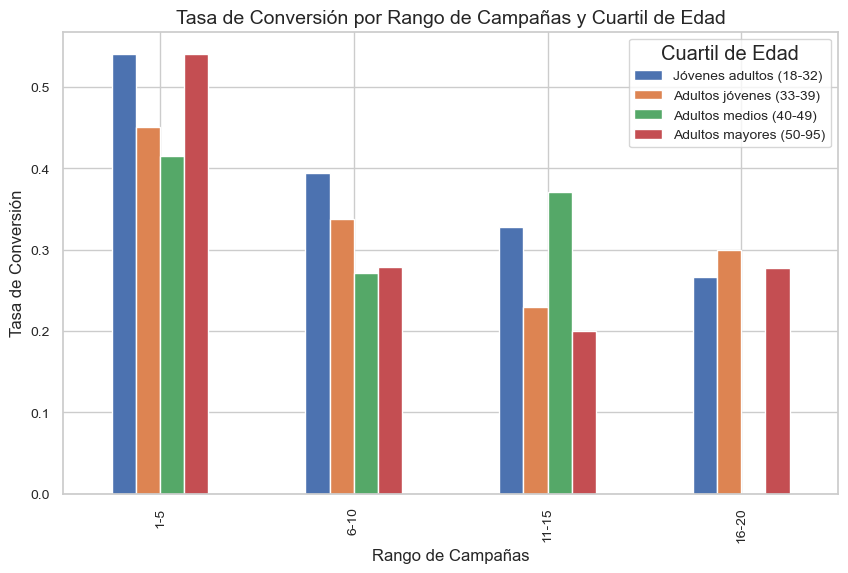

In [40]:
# Crear rangos de campañas
df_BANK_vista_marketing['campaign_range'] = pd.cut(df_BANK_vista_marketing['campaign'], bins=[0, 5, 10, 15, 20], labels=["1-5", "6-10", "11-15", "16-20"])

# Agrupar por rangos de campañas y graficar
conversion_by_campaign_range = df_BANK_vista_marketing.groupby(['age_range', 'campaign_range'])['deposit'].mean()
conversion_by_campaign_range.unstack().T.plot(kind='bar', figsize=(10,6))

plt.title('Tasa de Conversión por Rango de Campañas y Cuartil de Edad')
plt.xlabel('Rango de Campañas')
plt.ylabel('Tasa de Conversión')
plt.legend(title='Cuartil de Edad')
plt.show()


1. Mayor efectividad en las primeras campañas (1-5):

    En el rango de campañas de 1 a 5, la tasa de conversión es más alta para todos los cuartiles de edad. Especialmente para los cuartiles Q1 (18-32 años) y Q4 (50-95 años), con tasas de conversión superiores al 50%.
    Q2 (33-39 años) y Q3 (40-49 años) también tienen una buena tasa de conversión, aunque algo más baja.

Recomendación: La mayoría de las conversiones ocurre en las primeras 5 campañas. Esto sugiere que deberías concentrar tus esfuerzos en las primeras interacciones con los clientes, optimizando el contenido y el contacto en esas campañas iniciales para maximizar el impacto.
2. Disminución de la conversión a medida que aumenta el número de campañas:

    A partir del rango 6-10 campañas, la tasa de conversión disminuye para todos los cuartiles de edad. La tasa de conversión baja a menos del 30% en la mayoría de los casos.
    Para el cuartil Q3 (40-49 años), la conversión cae notablemente a cerca de 20%, lo que indica una baja efectividad en los contactos posteriores.

Recomendación: Es menos eficiente seguir contactando a clientes más allá de la 5ª campaña, ya que las probabilidades de conversión disminuyen drásticamente. A partir de este punto, deberías evaluar si continuar invirtiendo recursos en esos clientes es rentable o si es preferible adoptar un enfoque diferente (como cambiar el canal de contacto o la estrategia).
3. Clientes mayores (Q4) y menores (Q1) son más receptivos en general:

    El cuartil Q4 (50-95 años) muestra una alta tasa de conversión en las primeras campañas (1-5), lo que sugiere que los clientes mayores son muy receptivos al contacto inicial.
    El cuartil Q1 (18-32 años) también muestra una tasa de conversión alta en las primeras campañas y se mantiene relativamente estable hasta el rango 6-10 campañas.

Recomendación: Los clientes mayores (Q4) y jóvenes (Q1) deben ser prioritarios en las primeras campañas, ya que tienen mayor probabilidad de conversión. Adapta las estrategias para estos grupos en las primeras etapas del contacto para maximizar el éxito.
4. Cuartil Q3 (40-49 años) tiene tasas más bajas en general:

    En el cuartil Q3, las tasas de conversión son consistentemente más bajas en todos los rangos de campañas. Incluso en el rango 11-15 campañas, es el único grupo que muestra una tasa de conversión superior a la media en este rango, pero en general tiene menos receptividad que los otros cuartiles.

Recomendación: Para los clientes de mediana edad (Q3), deberías considerar cambios en la estrategia de contacto, como ajustar el canal o personalizar más los mensajes, ya que parecen ser menos receptivos a las campañas estándar.
5. Dificultad para obtener conversiones en campañas extendidas (16-20):

    En el rango de 16-20 campañas, la tasa de conversión es baja para todos los cuartiles de edad, con valores que rondan el 20% o menos.
    Esto sugiere que los clientes que han sido contactados más de 15 veces son muy poco propensos a convertir, sin importar el grupo de edad.

Recomendación: Si un cliente no ha convertido después de 15 campañas, puede no ser rentable seguir contactándolo. En este caso, podrías considerar dejar de intentar o cambiar por completo la estrategia de comunicación, evaluando si merece la pena seguir invirtiendo esfuerzos en estos clientes.
Conclusiones generales:

    Concentra los esfuerzos en las primeras campañas (1-5) para todos los grupos de edad, ya que es cuando las conversiones son más altas.
    Reduce el número de campañas después de la 5ª, especialmente si no has logrado una conversión, ya que la efectividad disminuye significativamente.
    Prioriza a los clientes jóvenes (Q1) y mayores (Q4) en las primeras campañas, ya que son los más receptivos.
    Considera ajustar la estrategia para los clientes de mediana edad (Q3), ya que muestran tasas de conversión más bajas en general.

# 5. Tasa de conversión de clientes que han sido contactados previamente por teléfono o móvil:

In [41]:
conversion_by_previous_contact = df_BANK_vista_marketing.groupby(['age_range', 'previous', 'contact'])['deposit'].mean()
print(conversion_by_previous_contact)



age_range                previous  contact  
Jóvenes adultos (18-32)  0         cellular     0.546983
                                   telephone    0.413793
                                   unknown      0.268844
                         1         cellular     0.675287
                                   telephone    0.750000
                                                  ...   
Adultos mayores (50-95)  55        telephone         NaN
                                   unknown           NaN
                         58        cellular          NaN
                                   telephone         NaN
                                   unknown           NaN
Name: deposit, Length: 408, dtype: float64


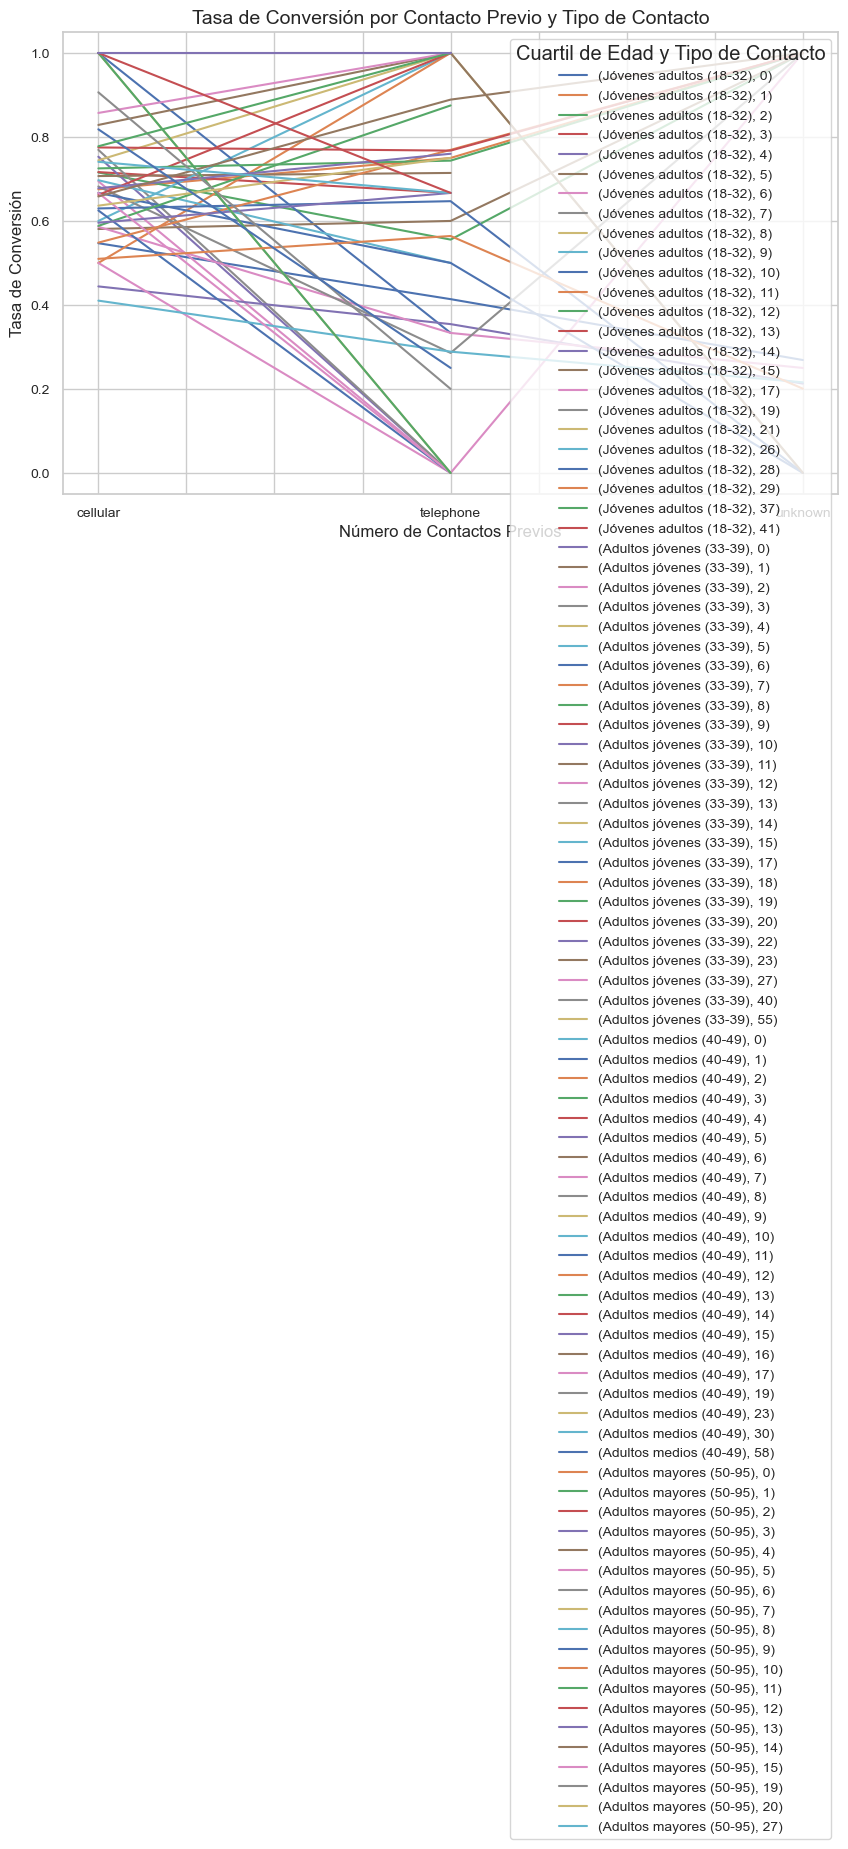

In [42]:
import matplotlib.pyplot as plt

# Filtrar solo los valores no nulos para evitar problemas en el gráfico
conversion_by_previous_contact_filtered = conversion_by_previous_contact.dropna()

# Convertir en DataFrame para facilitar el gráfico
conversion_df = conversion_by_previous_contact_filtered.unstack().T

# Graficar con líneas para ver la evolución de la conversión
conversion_df.plot(kind='line', figsize=(10,6))

# Añadir títulos y etiquetas
plt.title('Tasa de Conversión por Contacto Previo y Tipo de Contacto')
plt.xlabel('Número de Contactos Previos')
plt.ylabel('Tasa de Conversión')
plt.legend(title='Cuartil de Edad y Tipo de Contacto')

# Mostrar el gráfico
plt.show();


In [25]:
# Crear una agrupación simplificada de los tipos de contacto
df_BANK_vista_marketing['contact_group'] = df_BANK_vista_marketing['contact'].replace({
    'telephone': 'no_cellular', 
    'unknown': 'no_cellular', 
    'cellular': 'cellular'
})

# Agrupar por cuartil de edad, rango de contactos previos y grupo de contacto
conversion_by_contact_group = df_BANK_vista_marketing.groupby(['age_range', 'previous_range', 'contact_group'])['deposit'].mean()

# Graficar los resultados agrupados
conversion_by_contact_group.unstack().T.plot(kind='bar', figsize=(10,6), stacked=True)

plt.title('Tasa de Conversión por Grupo de Contacto y Rango de Contactos Previos')
plt.xlabel('Rango de Contactos Previos')
plt.ylabel('Tasa de Conversión')
plt.legend(title='Grupo de Contacto')
plt.show()




KeyError: 'previous_range'

In [ ]:
# Agrupar por edad, combinando cuartiles en dos grupos
df_BANK_vista_marketing['age_group'] = df_BANK_vista_marketing['age_range'].replace({
    'Q1': 'young', 'Q2': 'semi-young', 'Q3': 'semi-old', 'Q4': 'old'
})

# Agrupar y calcular la tasa de conversión
conversion_by_age_group = df_BANK_vista_marketing.groupby(['age_group', 'previous_range', 'contact_group'])['deposit'].mean()

# Graficar los datos agrupados por grupos de edad y contacto
conversion_by_age_group.unstack().T.plot(kind='bar', figsize=(10,6))

plt.title('Tasa de Conversión por Grupo de Edad y Contactos Previos')
plt.xlabel('Rango de Contactos Previos')
plt.ylabel('Tasa de Conversión')
plt.legend(title='Grupo de Contacto')
plt.show()


In [ ]:
# Lista de los grupos de edad
age_groups = ['young', 'semi-young', 'semi-old', 'old']

# Loop para graficar individualmente cada grupo de edad
for group in age_groups:
    # Filtrar los datos solo para el grupo de edad actual
    conversion_group = conversion_by_age_group.loc[group].unstack().T
    
    # Graficar los datos del grupo actual
    conversion_group.plot(kind='bar', figsize=(10,6))
    
    # Añadir títulos y etiquetas
    plt.title(f'Tasa de Conversión para {group.capitalize()} por Contactos Previos y Tipo de Contacto')
    plt.xlabel('Rango de Contactos Previos')
    plt.ylabel('Tasa de Conversión')
    plt.legend(title='Grupo de Contacto')
    
    # Mostrar el gráfico
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Lista de los grupos de edad
age_groups = ['young', 'semi-young', 'semi-old', 'old']

# Crear subplots, uno por cada grupo de edad
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,6), sharey=True)

# Loop para graficar individualmente cada grupo de edad
for idx, group in enumerate(age_groups):
    # Filtrar los datos solo para el grupo de edad actual
    conversion_group = conversion_by_age_group.loc[group].unstack().T
    
    # Graficar los datos del grupo actual en el subplot correspondiente
    conversion_group.plot(kind='bar', ax=axes[idx], legend=False)
    
    # Añadir títulos y etiquetas a cada subplot
    axes[idx].set_title(f'{group.capitalize()}')
    axes[idx].set_xlabel('Rango de Contactos Previos')
    axes[idx].set_ylabel('Tasa de Conversión')

# Ajustar los títulos y mostrar la leyenda en el gráfico principal
fig.suptitle('Tasa de Conversión por Grupo de Edad y Contactos Previos', fontsize=16)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Grupo de Contacto', loc='upper right')

plt.tight_layout()
plt.show()
